
### Instructor: Rina Buoy

## Import MNIST

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

## Visualizing a sample image

In [ ]:
print(X.shape)

(1797, 64)


X is a matrix containing 1797 images and each image is a 1D vector of 64.

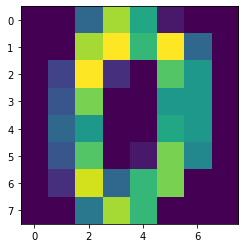

In [ ]:
import matplotlib.pyplot as plt

# reshape image from 64 to 8 by 8 for plotting
plt.imshow(X[0].reshape(8,8))

In [ ]:
print(y[0])

0


## Using PCA for 2D visualization of high dimension data (64 in this case)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
X_pca = pca.fit_transform(X)

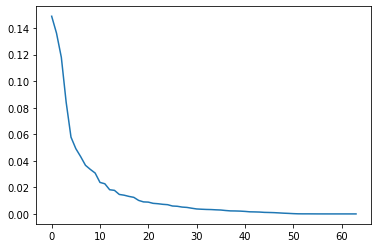

In [ ]:
plt.plot(pca.explained_variance_ratio_)

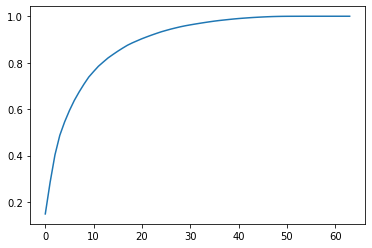

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

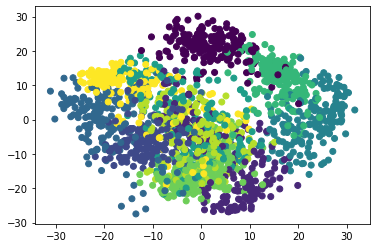

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=y)

## Dimension Reduction & Classification Performance

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, y)
print(clf.score(X,y))

1.0


In [ ]:
X.shape

(1797, 64)

In [ ]:
clf_pca = SVC(gamma='auto')
X_3pca = X_pca[:,:3]
clf_pca .fit(X_3pca, y)
print(clf_pca.score(X_3pca ,y))

0.9788536449638287


In [ ]:
X_3pca.shape

(1797, 3)

## Image Compression with PCA/SVD

In [ ]:
!wget https://raw.githubusercontent.com/maxogden/cats/master/cat_photos/6cd3d502c03011e180c9123138016265_7.png

--2022-01-19 07:29:43--  https://raw.githubusercontent.com/maxogden/cats/master/cat_photos/6cd3d502c03011e180c9123138016265_7.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 560939 (548K) [image/png]
Saving to: ‘6cd3d502c03011e180c9123138016265_7.png’

6cd3d502c03011e180c 100%[===================>] 547.79K  --.-KB/s    in 0.04s   

2022-01-19 07:29:43 (12.8 MB/s) - ‘6cd3d502c03011e180c9123138016265_7.png’ saved [560939/560939]



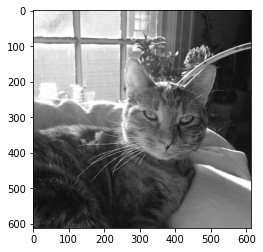

In [ ]:
import matplotlib.image as pimg
from PIL import Image
img = Image.open('6cd3d502c03011e180c9123138016265_7.png').convert('L')
plt.imshow(img,cmap='gray')

In [ ]:
U,S,VT = np.linalg.svd(img)

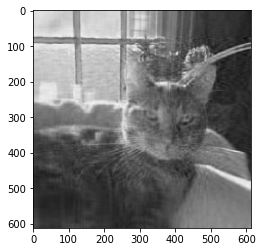

In [ ]:
k =30

kimg = np.dot(np.dot(U[:,:k],np.diag(S[:k])),VT[:k])
plt.imshow(kimg,cmap='gray')